<h1>Part 1: Exploratory Data Analysis</h1>

In [27]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [42]:
df=pd.read_json("logins.json")
df.sort_values(by='login_time',inplace=True)
df.describe()
df.head()

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37


In [43]:
df.set_index('login_time',inplace=True)
df['count']=1
df.sort_index(inplace=True)
df_login_count=df.resample("15min").sum()



In [44]:
df_login_count.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025B44E886D8>],
      dtype=object)

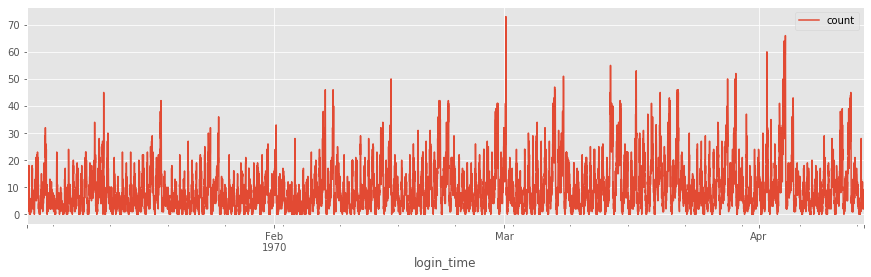

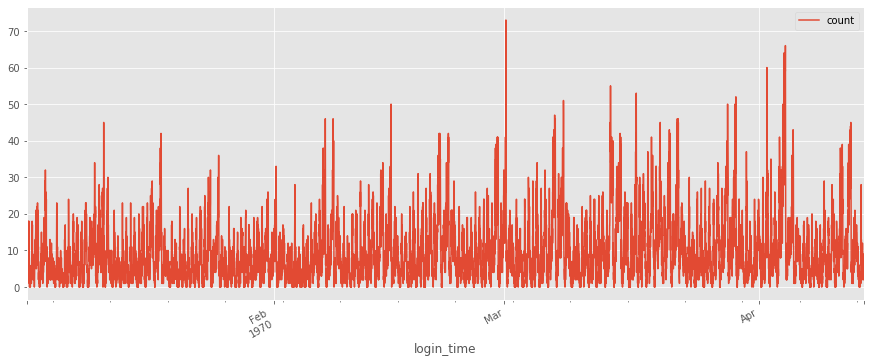

In [51]:
df_login_count.plot(figsize=(15,4))
df_login_count.plot(subplots=True, figsize=(15,6))

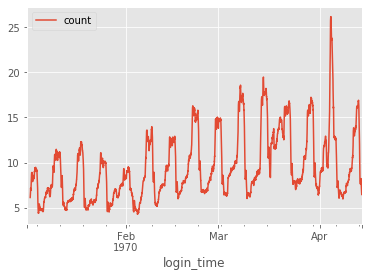

In [54]:
df_login_count.rolling(window=96).mean().plot()

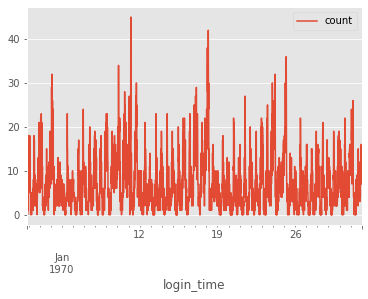

In [55]:
df_login_count.loc['1970-01'].plot()

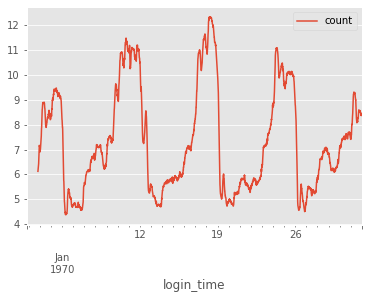

In [56]:
df_login_count.loc['1970-01'].rolling(window=96).mean().plot()

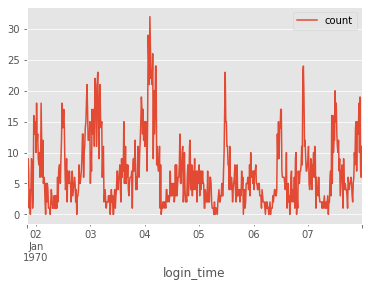

In [61]:
df_login_count.loc['1970-01-01':'1970-01-07'].plot()


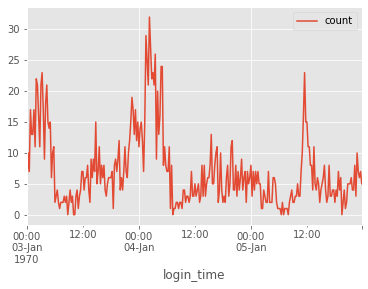

In [63]:
df_login_count.loc['1970-01-03':'1970-01-05'].plot()

In [66]:
date = datetime.datetime(1970, 1, 4)
date.weekday()  


6

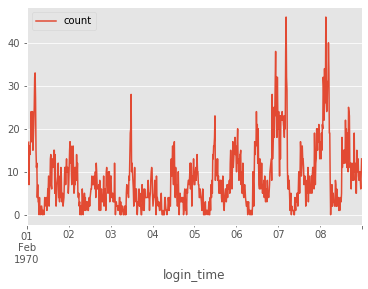

In [69]:
df_login_count.loc['1970-02-01':'1970-02-08'].plot()

In [70]:
datetime.datetime(1970, 2, 8).weekday()  

6

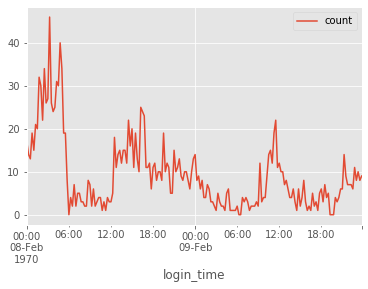

In [75]:
df_login_count.loc['1970-02-08':'1970-02-09'].plot()

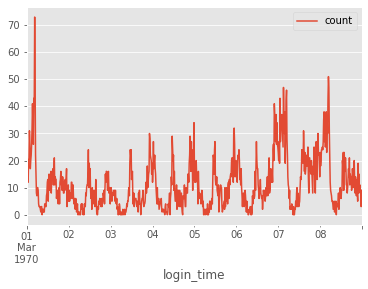

In [77]:
df_login_count.loc['1970-03-01':'1970-03-08'].plot()

In [78]:
datetime.datetime(1970, 3, 1).weekday()  

6

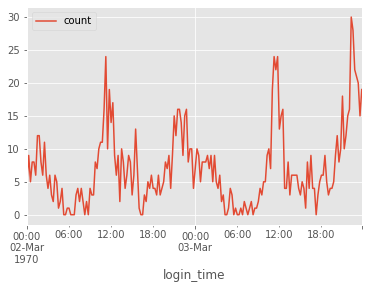

In [91]:
df_login_count.loc['1970-03-02':'1970-03-03'].plot()

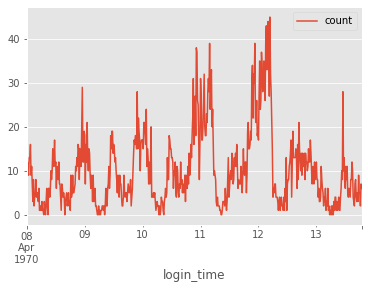

In [83]:
df_login_count.loc['1970-04-08':'1970-04-14'].plot()

In [84]:
datetime.datetime(1970, 4,12).weekday()  

6

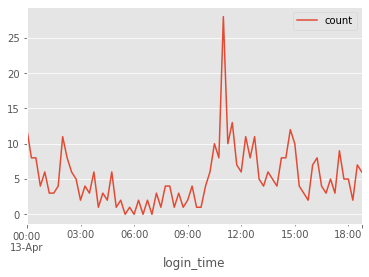

In [90]:
df_login_count.loc['1970-04-13':'1970-04-14'].plot()

<html>
<h1>Conclusion:</h1>
<body>
<p>1.The demand is high in the weekends at midnight and also in afternoon</p>
<p>2.On other days the peak is observed in the afternoon.</p>
</body>
</html>


<h1>Part 3 :</h1>

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [120]:
openfile=open('ultimate_data_challenge.json')
jsondata=json.load(openfile)
users3_df=pd.DataFrame(jsondata)
users3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [122]:
users3_df['signup_date'] = pd.to_datetime(users3_df['signup_date'])
users3_df['last_trip_date'] = pd.to_datetime(users3_df['last_trip_date'])

In [124]:
last_date = users3_df.last_trip_date.max()

In [126]:
cut_off_day = last_date - pd.Timedelta('30 days')
users3_df['active_status'] = (users3_df.last_trip_date > cut_off_day).astype('int')
users3_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_status
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [128]:
users3_df.city.value_counts()


Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [129]:
users3_df.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [131]:
users3_df.phone.fillna('Other', inplace=True)
users3_df.phone.value_counts()

iPhone     34582
Android    15022
Other        396
Name: phone, dtype: int64

In [167]:
users3_df.avg_rating_by_driver.mean()

4.778158195947439

In [168]:
users3_df.avg_rating_of_driver.mean()

4.341401999999789

In [169]:

users3_df.avg_rating_of_driver.fillna(4.34, inplace=True)
users3_df.avg_rating_by_driver.fillna(4.7,inplace=True)
#users3_df.avg_rating_of_driver.value_counts()

In [ ]:
users3_df = pd.get_dummies(users3_df, columns = ['city', 'phone'])

In [154]:
active_user = users3_df[users3_df.active_status == 1]
inactive_user = users3_df[users3_df.active_status == 0]

In [155]:
fraction = round((len(active_user.active_status)/len(users3_df.active_status)) * 100, 2)
print('{} percent of users were retained.'.format(fraction))

36.62 percent of users were retained.


In [ ]:
#Predictive Model

In [156]:
feature_columns = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
 'surge_pct', 'ultimate_black_user', 'weekday_pct', 'city_Astapor',
 "city_King's Landing", 'city_Winterfell', 'phone_Android','phone_iPhone']

In [172]:
X=users3_df[feature_columns]
y=users3_df['active_status']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [173]:
classifier_rf = RandomForestClassifier(random_state=0, criterion='gini', max_depth=20, 
                                       max_features=4, min_samples_leaf=7, min_samples_split=5, n_estimators=100)

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [175]:
#dt_model1 = classifier_rf.best_estimator_
print(classifier_rf.score(X_train,y_train))

0.8302666666666667


In [179]:
pred_test=classifier_rf.predict(X_test)
pred_test

array([1, 1, 0, ..., 0, 0, 1])

In [180]:
accuracy_score(y_test,pred_test)

0.78192

In [182]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf1 = GridSearchCV(classifier_rf, tree_para, cv=5)
clf1.fit(X_train, y_train)
dt_model1 = clf1.best_estimator_
print(dt_model1.score(X_train, y_train))

0.8154133333333333


In [183]:
pred_test=clf1.predict(X_test)
pred_test

array([1, 0, 0, ..., 0, 0, 1])

In [185]:
accuracy_score(y_test,pred_test)

0.7852

In [187]:
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature 0 (0.340024)
2. feature 6 (0.164507)
3. feature 1 (0.102060)
4. feature 2 (0.090689)
5. feature 4 (0.075823)
6. feature 3 (0.059720)
7. feature 8 (0.051165)
8. feature 5 (0.038840)
9. feature 10 (0.027965)
10. feature 11 (0.023352)
11. feature 7 (0.016490)
12. feature 9 (0.009366)


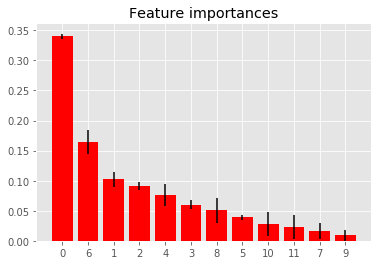

In [188]:
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

<h1>Conclusion:</h1>
<p>Tha accuracy of the model is 0.7852 and the important features that influence the rider retention are "avg_dist","weekday_pct","avg_rating_by_driver"</p>    